# **Capstone Project Modul 3 Vonny Yudianto**
**Data Saudi Used Cars**

Untuk mengimplementasikan materi yang telah dipelajari, siswa akan mengerjakan dan menyelesaikan Capstone Project Module 3, guna melatih kemampuan analisis data serta membangun suatu model machine learning (ML) yang sesuai dengan data dan kebutuhan bisnis.  

Project ini akan membahas mengenai model prediksi harga Mobil Bekas Arab Saudi. File kode ini akan berisikan langkah – langkah, seperti Pemahaman Masalah Bisnis, Pemahaman Data, Pembersihan Data, Analisis Data, Features Engineering, Pemodelan, Kesimpulan dan Rekomendasi. Hal ini berguna untuk memberikan prediksi dan wawasan sebagai Ilmuwan Data kepada pemangku kepentingan.  

## **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Features Engineering
5. Modeling
6. Conclusion
7. Recommendation

****

## **1. Business Problem Understanding**

**Context :**  
Membeli mobil bekas bukan merupakan hal yang wajar ketika pelanggan asal membelinya di tempat yang aman dan terpercaya. Sudah banyak tempat jual beli mobil bekas yang tersedia di berbagai negara. Tentunya para penjual mobil bekas akan berlomba - lomba memberikan penawaran harga yang tepat kepada para pelanggannya.  

Proses jual beli mobil bekas bisa menjadi rumit ketika penentuan harga harus meyesuaikan dengan harga pasar terbaik. Banyak orang tidak mengetahui tentang tren pasar terkini dan membutuhkan pendekatan yang andal untuk menganalisa hal tersebut. Pedekatan ini akan berguna untuk memberi perkiraan harga berdasarkan data pasar yang ada.

**Problem Statement :**  
Salah satu tantangan terbesar bagi perusahaan/platform jual beli mobil bekas adalah **bagaimana menentukan harga jual mobil bekas yang kompetitif atau sesuai dengan pasar berdasarkan detail mobil tersebut**. Tentunya perusahaan tidak ingin menjual mobil bekas dengan harga yang tidak tepat (kemahalan atau kemurahan). Sebab, harga yang terlalu tinggi akan membuat pelanggan tidak tertarik untuk membeli. Sedangkan, harga yang terlalu rendah akan membuat bisnis menjadi rugi.  

Perusahaan pasti menginginkan keuntungan yang besar dalam menjual mobil bekas dengan memasang penawaran harga paling tepat serta sesuai dengan detail mobil bekas tersebut. Itu sebabnya, cara menentukan harga yang paling tepat adalah salah satu masalah untuk menghasilkan keuntungan besar pada bisnis jual beli mobil bekas.


**Goals :**  
Berdasarkan permasalahan di atas, tentu dibutuhkan **sebuah ‘tool’ yang dapat memprediksi harga yang sesuai, yang dapat diandalkan pelanggan untuk menjual mobil bekas berdasarkan detail mobil bekas tersebut**. Jika seseorang memiliki mobil yang ingin dijual, maka ‘tool’ ini dapat memberikan perkiraan harga berdasarkan tren pasar dan menyesuaikan dengan spesifikasi mobil untuk menyelamatkan pengguna dari kerumitan dalam menentukan harga yang sesuai.  

Dalam project ini, saya akan membuat suatu model mesin learning untuk memprediksi harga mobil bekas bagi pengguna yang tertarik untuk menjual mobil mereka. Dengan model ini, bisnis akan mendapat manfaat dengan menggunakannya untuk memberikan perkiraan harga mobil yang ingin mereka jual.

**Analytic Approach :**  
Jadi, hal yang perlu dilakukan adalah menganalisis data untuk dapat menemukan pola dari fitur - fitur yang ada dan dapat membedakan satu mobil bekas dengan yang lainnya.  

Kemudian, membangun suatu model regresi yang berguna sebagai ‘tool’ bagi perusahaan untuk membuat keputusan yang lebih baik dan membantu dalam memprediksi harga mobil bekas. Tentunya saya ingin membuat model yang bagus untuk membantu perusahaan dalam memprediksi harga sesuai dengan spesifik mobil bekas.  

Regresi adalah suatu metode machine learning yang digunakan untuk memprediksi data atau variabel yang sifatnya numerik.

**Evaluation Metrics :**  
Metrik evaluasi yang akan digunakan adalah RMSE, MAE, dan MAPE. Root Mean Squared Error (RMSE) adalah nilai rataan akar kuadrat dari error. Mean Absolute Error (MAE) adalah rataan nilai absolut dari error. Sedangkan, Mean Absolute Percentage Error (MAPE) adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, maka semakin akurat model dalam memprediksi harga mobil bekas dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

## **2. Data Understanding**

- Dataset berisikan record mobil bekas yang dikumpulkan dari syarah.com.
- Setiap baris data merepresentasikan informasi terkait mobil bekas dan detailnya.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Type | Object | Jenis mobil bekas |
| Region | Object | Wilayah mobil bekas ditawarkan untuk dijual |
| Make | Object | Nama perusahaan mobil bekas |
| Gear_Type | Object | (Automatic / Manual) |
| Origin | Object | Negara pengimpor (Gulf / Saudi / Other) |
| Options | Object | (Full Options / Semi-Full / Standard) |
| Year | Integer | Tahun Pembuatan |
| Engine_Size | Float | Ukuran mesin mobil bekas |
| Mileage | Integer | Jarak tempuh mobil bekas (dalam km) |
| Negotiable | Boolean | Status nego mobil bekas. Jika 'True', harga bisa dinegosiasikan |
| Price | Integer | Harga mobil bekas |

<br>
Attribute 'Price' adalah target dalam kasus ini untuk dipresiksi (variabel dependent). Sedangkan, attribute - attribute lainnya akan menjadi attribute pendukung untuk memprediksi 'Price' (variabel independent).

In [73]:
# Import Library Untuk Eksplorasi Dataset (EDA)
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

# Untuk mengubah Notasi Ilmiah ke Format Desimal
pd.options.display.float_format = '{:.4f}'.format

In [74]:
# Load Dataset
df = pd.read_csv('data_saudi_used_cars.csv')
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4000,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0000,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0000,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4000,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0000,49000,True,0


Dari tabel di atas, terlihat bahwa terdapat nilai 0 pada variable 'Price'. Hal ini akan ditindaklanjutin pada proses Cleaning Data.

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


### **Exploratory Data Analysis (EDA)**  
Exploratory Data Analysis (EDA) merupakan proses dalam proyek Analisis Data yang dilakukan dengan cara menyelidiki dataset untuk menemukan pola, dan anomali, serta lainnya berdasarkan pemahaman tentang dataset yang dimiliki. Exploratory Data Analysis biasanya dilakukan dengan pembuatan ringkasan statistik data numerik dalam dataset dan membuat berbagai macam visualisasi grafik untuk memahami data dengan lebih baik.  

Seperti yang sudah disebutkan sebelumnya, kolom Price akan menjadi variabel target dalam kasus ini. Kemudian, kolom lainnya akan menjadi variabel independen.  
Variabel independen ini akan dibagi lagi menjadi variabel Kategorikal dan Numerik.  
- Numerical Variabels : Year, Engine_Size, Mileage, Price  
- Categorical Variabels : Type, Region, Make, Gear_Type, Origin, Options, Negotiable

In [76]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Type,object,0,0.0000,347,"[Abeka, Sylvian Bus]"
1,Region,object,0,0.0000,27,"[Arar, Aseer]"
2,Make,object,0,0.0000,58,"[Mitsubishi, Bentley]"
3,Gear_Type,object,0,0.0000,2,"[Automatic, Manual]"
4,Origin,object,0,0.0000,4,"[Unknown, Gulf Arabic]"
5,Options,object,0,0.0000,3,"[Standard, Full]"
6,Year,int64,0,0.0000,50,"[1978, 2007]"
7,Engine_Size,float64,0,0.0000,71,"[5.3, 3.5]"
8,Mileage,int64,0,0.0000,1716,"[153042, 264000]"
9,Negotiable,bool,0,0.0000,2,"[True, False]"


In [77]:
# Menampilkan ringkasan statistik data numerik
df.describe()

,Year,Engine_Size,Mileage,Price
count,5624.0000,5624.0000,5624.0000,5624.0000
mean,2014.1019,3.2954,150923.3750,53074.0581
std,5.7916,1.5151,382835.9630,70155.3406
min,1963.0000,1.0000,100.0000,0.0000
25%,2012.0000,2.0000,38000.0000,0.0000
50%,2016.0000,3.0000,103000.0000,36500.0000
75%,2018.0000,4.5000,196000.0000,72932.5000
max,2022.0000,9.0000,20000000.0000,850000.0000


In [78]:
# Menampilkan ringkasan statistik data kategorikal
df.describe(exclude="number")

,Type,Region,Make,Gear_Type,Origin,Options,Negotiable
count,5624,5624,5624,5624,5624,5624,5624
unique,347,27,58,2,4,3,2
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full,False
freq,269,2272,1431,4875,4188,2233,3828


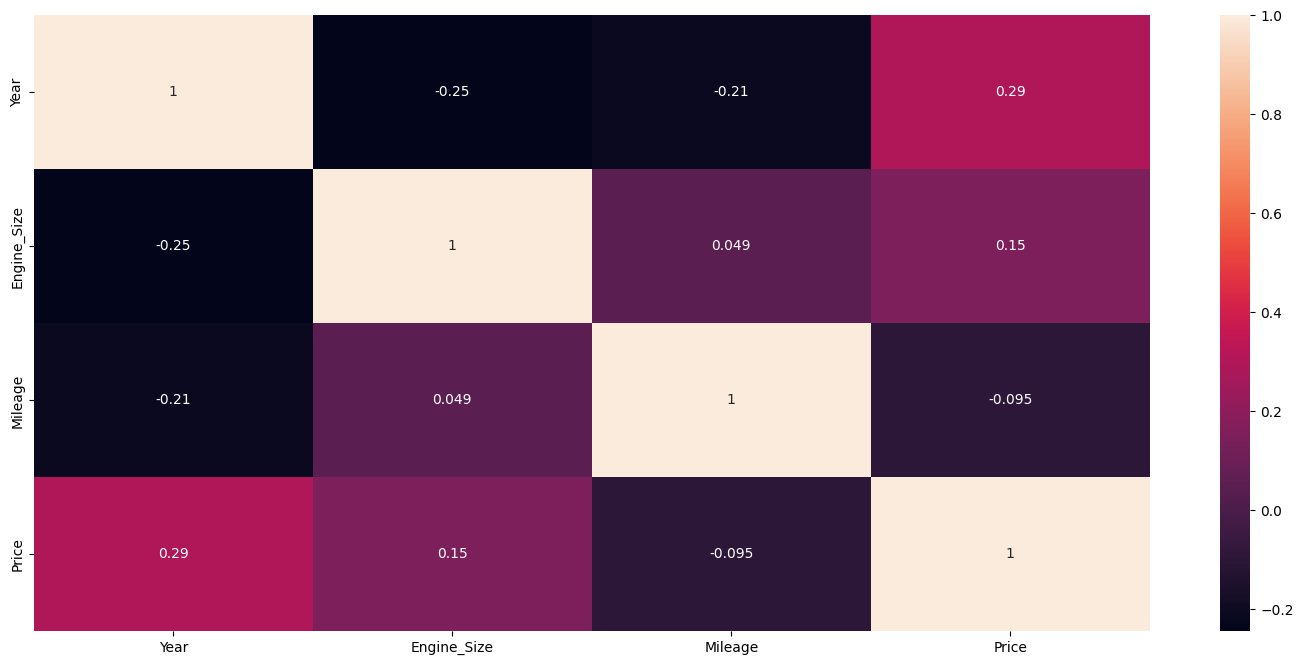

In [79]:
# Membuat Heatmap untuk melihat hubungan korelasi antar variable numerik
DataNumerik = df[['Year', 'Engine_Size', 'Mileage', 'Price']]
plt.figure(figsize = (18,8))
sns.heatmap(DataNumerik.corr(), annot = True)
plt.show()

**Wawasan / Insights :**  
Dapat dilihat dari heatmap di atas, bahwa variable 'Option', 'Year', dan 'Engine_Size' memiliki korelasi yang positif terhadap variable 'Price'. Sedangkan, variable 'Mileage' terhadap variable 'Price' berkorelasi negatif.

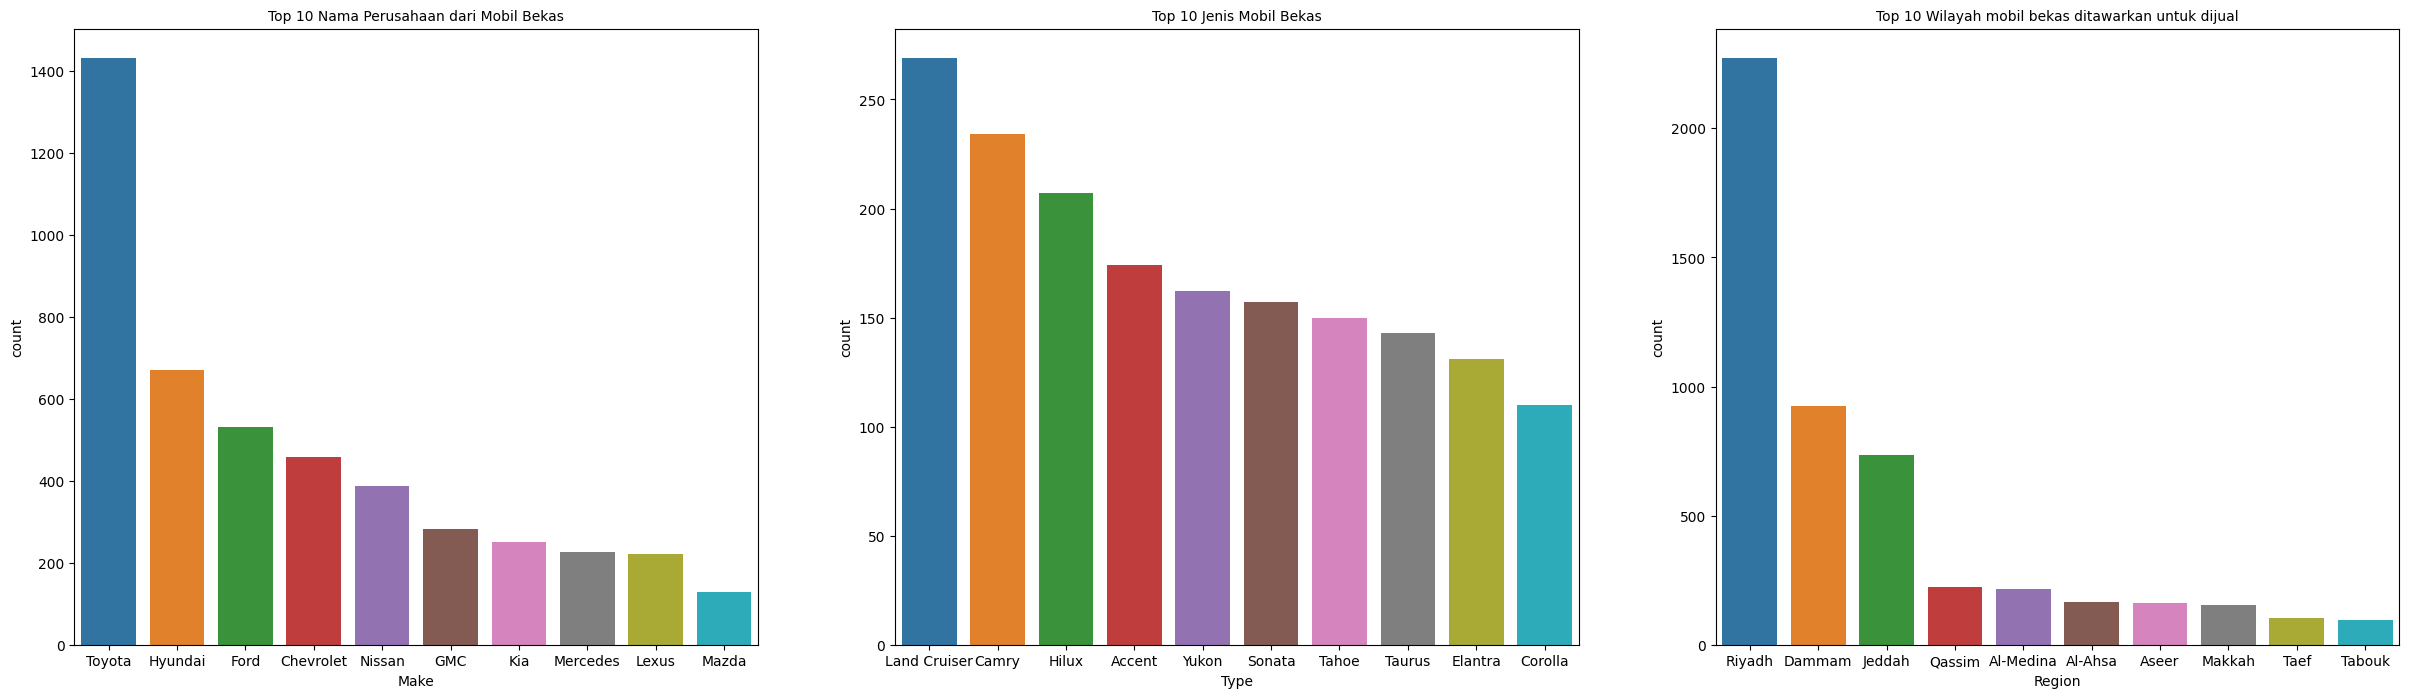

In [80]:
# Membangun grafik visualisasi untuk variable kategorikal
plt.figure(figsize=(30,8))

plt.subplot(1,3,1)
sns.countplot(x = df['Make'], order = df['Make'].value_counts().iloc[:10].index)
plt.title('Top 10 Nama Perusahaan dari Mobil Bekas', size = 10)

plt.subplot(1,3,2)
sns.countplot(x = df['Type'], order = df['Type'].value_counts().iloc[:10].index)
plt.title('Top 10 Jenis Mobil Bekas', size = 10)

plt.subplot(1,3,3)
sns.countplot(x = df['Region'], order = df['Region'].value_counts().iloc[:10].index)
plt.title('Top 10 Wilayah mobil bekas ditawarkan untuk dijual', size = 10)

plt.show()

**Wawasan / Insights :**  
- 10 nama perusahaan mobil yang produknya paling banyak dijual sebagai mobil bekas adalah Toyota, Hyundai, Ford, Chevrolet, Nissan, GMC, Kia, Mercedes, Lexus, dan Mazda.
- 10 tipe mobil bekas yang paling banyak dijual sebagai mobil bekas adalah Land Cruiser, Camry, Hilux, Accent, Yukon, Sonata, Tahoe, Taurus, Elantra, dan Corolla. 
- Dari gambar di atas, kota Riyadh, Dammam, dan Jeddah merupakan wilayah mobil bekas paling banyak dijual.

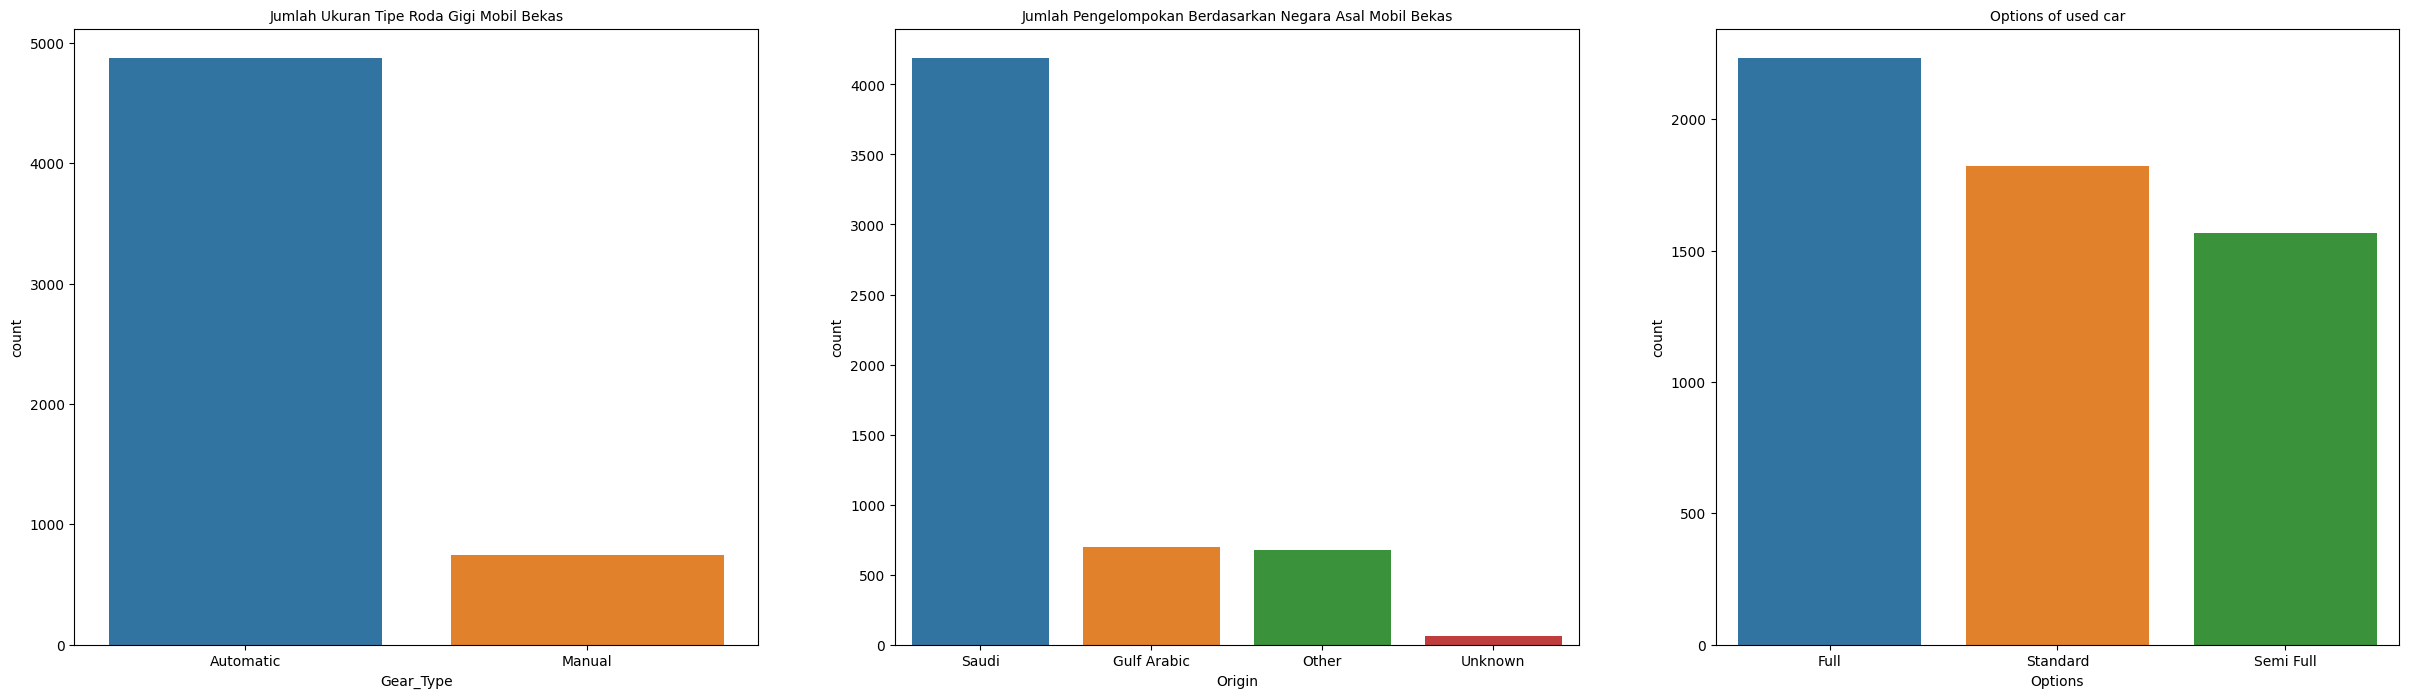

In [81]:
# Membangun grafik visualisasi untuk variable kategorikal
plt.figure(figsize=(30,8))

plt.subplot(1,3,1)
sns.countplot(x = df['Gear_Type'], order = df['Gear_Type'].value_counts().index)
plt.title('Jumlah Ukuran Tipe Roda Gigi Mobil Bekas', size = 10)

plt.subplot(1,3,2)
sns.countplot(x = df['Origin'], order = df['Origin'].value_counts().index)
plt.title('Jumlah Pengelompokan Berdasarkan Negara Asal Mobil Bekas', size = 10)

plt.subplot(1,3,3)
sns.countplot(x = df['Options'], order = df['Options'].value_counts().index)
plt.title('Options of used car', size = 10)

plt.show()

**Wawasan / Insights :**  
- Ternyata, hanya beberapa mobil dengan tipe gear 'Manual' yang dijual. Mobil bekas yang dijual lebih banyak dengan tipe gear 'Automatic'.
- Saudi adalah Negara Asal mobil bekas terbanyak, yaitu lebih dari 4000 mobil bekas.
- Mobil bekas dengan Options 'Full', tampaknya lebih disukai untuk penjualan mobil bekas daripada Options lainnya.

In [82]:
# Menampilkan informasi mengenai Variable Negotiable
df['Negotiable'].value_counts()

False    3828
True     1796
Name: Negotiable, dtype: int64

**Wawasan / Insights :**  
- Terlihat dari perhitungan di atas, ada banyak jumlah mobil bekas yang tidak bisa ditawar.

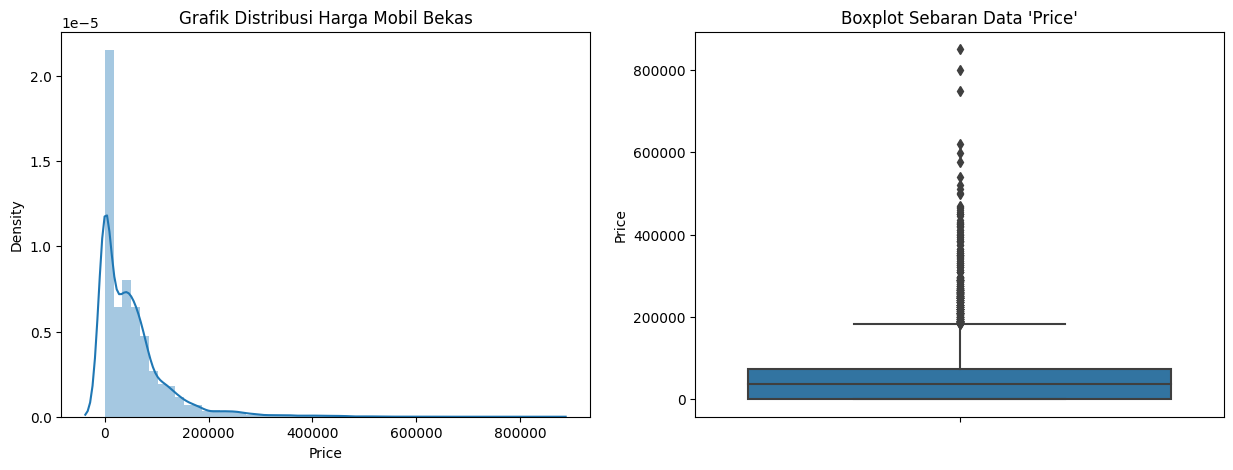

In [83]:
# Menampilkan visualisasi grafik untuk Variable Price
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Grafik Distribusi Harga Mobil Bekas')
sns.distplot(df.Price)
plt.ticklabel_format(useOffset = False, style = 'plain', axis = ('x'))

plt.subplot(1,2,2)
plt.title("Boxplot Sebaran Data 'Price'")
sns.boxplot(y = df.Price)
plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')

plt.show()

**Wawasan / Insights :**  
- Dari grafik di atas, tampak jelas bahwa distribusi variable 'Price' condong ke kanan dan tidak berdistribusi normal. 
- Terdapat banyak data outlier.

## **3. Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Data Cleaning memiliki peranan penting sebagai tahap awal pengolahan data. Hal ini disebabkan data yang kotor dapat mempengaruhi hasil pengujian yang dilakukan. Proses Data cleaning biasanya terdiri dari menangani data Anomali, yaitu: missing value, data outlier, data formatting, dan/atau data duplikat. Mari kita mulai.  

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

**Data Duplikat**

In [84]:
# Membuat duplikasi dataframe
df_model = df.copy()

In [85]:
# Mengecek baris data duplikat
print("Jumlah baris data duplikat : ", sum(df_model.duplicated()))

Jumlah baris data duplikat :  4


In [86]:
# Hapus baris data duplikat
df_model.drop_duplicates(inplace = True)
print("Jumlah baris data duplikat : ", sum(df_model.duplicated()))

Jumlah baris data duplikat :  0


**Missing Value**

In [87]:
# Mengecek Missing Value
df_model.isnull().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

Dari rumusan di atas, terlihat bahwa tidak ada data kosong. Namun, berdasarkan Exploratory Data Analysis di atas, terlihat pada variable 'Origin' terdapat data yang bersifat ambigu, yaitu 'Other' dan 'Unknown'. Sebenarnya, hal ini termasuk ke dalam kasus missing value dan karena variable ini merupakan variabel kategorik, maka kita akan mengatasi permasalahan ini dengan metode `Simple imputer : Constant`, yaitu data 'Unknown' diubah menjadi 'Other'.

In [88]:
# Melihat Informasi variable 'Origin'
df_model['Origin'].value_counts()

Saudi          4184
Gulf Arabic     697
Other           678
Unknown          61
Name: Origin, dtype: int64

In [89]:
# Mengubah data 'Unknown' menjadi 'Other' pada variable 'Origin'
df_model['Origin'] = df_model['Origin'].replace('Unknown','Other')

In [90]:
# Melihat Kembali Informasi variable 'Origin'
df_model['Origin'].value_counts()

Saudi          4184
Other           739
Gulf Arabic     697
Name: Origin, dtype: int64

**Data Formatting**

Kemudian, kita akan menghapus fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi. Tentunya perlu ada pertimbangan sebelum melakukan penghapusan  pada kolom atau fitur. Variable / fitur / kolom yang akan di hapus itu adalah 'Negotiable'. Pertimbangannya adalah sebagai berikut.  
- Model yang akan dibentuk adalah model regresi yang diterapkan untuk memprediksi harga mobil. Dengan begitu, model yang dibentuk dapat memberikan penjual harga terbaik berdasarkan data yang dimiliki. 
- Variable 'Price' akan menjadi variable target dalam pemodelan yang dibentuk. Sehingga, variable 'Negotiable' perlu dihapus, karena tidak relevan. Hal ini dilakukan untuk membatasi nilai ekstrem dari variabel yang dapat mempengaruhi model yang akan dibentuk, juga untuk mengantisipasi overfitting pada model.

In [91]:
# Menghapus variable yang tidak diperlukan
df_model.drop(['Negotiable'], axis=1, inplace=True)

**Data Outlier**  
Data outlier dapat berdampak besar pada kumpulan data yang ada. Sebab, data outlier akan meningkatkan varian kesalahan dan mengurangi kekuatan uji statistik yang dilakukan. Hal ini juga dapat menyebabkan bias dan mempengaruhi hasil perkiraan, serta dapat memengaruhi asumsi dasar regresi nantinya.

`1. Variable 'Price'`  
Lalu, seperti yang sudah disampaikan sebelumnya bahwa terdapat nilai 0 pada variable 'Price'. Oleh sebab itu, perlu dilakukan penanganan. Variable 'Price' merupakan kolom terpenting yang perlu dibersihkan karena merupakan variable target untuk analisis regresi. Mari kita lihat data tersebut.

In [92]:
df_model[df_model.Price == 0]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4000,421000,0
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0000,49000,0
9,LS,Aseer,Lexus,Automatic,Saudi,Full,1998,4.6000,300,0
14,Hilux,Yanbu,Toyota,Automatic,Saudi,Full,2014,2.7000,209,0
15,Land Cruiser,Aseer,Toyota,Manual,Gulf Arabic,Semi Full,1982,4.6000,340000,0
...,...,...,...,...,...,...,...,...,...,...
5610,Town Car,Jeddah,Lincoln,Automatic,Other,Full,1999,5.0000,343,0
5614,Victoria,Makkah,Ford,Automatic,Saudi,Standard,2010,4.6000,345000,0
5617,Yukon,Jubail,GMC,Automatic,Saudi,Semi Full,2006,5.3000,300,0
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5000,58000,0


Ternyata ada 1786 dari 5620 data yang bernilai 0. Artinya, 31,95% data dalam variable 'Price' nilainya nol. Angka ini cukup besar untuk dihapus datanya. Namun, untuk mengisinya pun membutuhkan proses yang panjang dan memakan waktu. Hal ini dikarenakan untuk mengisi data yang benilai nol, harus disesuaikan dengan variable lainnya, serta perlu dilakukan survei lebih mendalam. Oleh sebab itu, data yang bernilai nol ini akan tetap kita hapus untuk melanjutkan proses yang ada dan untuk menghindari pengaruh yang besar pada model yang akan dibentuk.   

In [93]:
df_model = df_model[df_model['Price'] != 0]

Mari mengecek data outlier lainnya pada variable 'Price' dengan mengurutkan baris data dari terkecil.

In [94]:
df_model.sort_values(by = 'Price', ascending = 1, inplace = True)
df_model

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3131,Yukon,Jubail,GMC,Automatic,Saudi,Full,2019,5.3000,50000,1
3992,G80,Riyadh,Genesis,Automatic,Other,Semi Full,2018,3.8000,170000,500
4399,Yaris,Riyadh,Toyota,Automatic,Saudi,Standard,2018,1.5000,100000,850
5128,Rio,Arar,Kia,Automatic,Saudi,Standard,2019,1.4000,55500,884
3474,Yaris,Najran,Toyota,Automatic,Saudi,Standard,2019,1.6000,85000,950
...,...,...,...,...,...,...,...,...,...,...
4653,Range Rover,Riyadh,Land Rover,Automatic,Other,Full,2019,5.0000,4200,599000
2120,Ghost,Dammam,Rolls-Royce,Automatic,Saudi,Full,2016,6.0000,40000,620000
4273,S,Dammam,Mercedes,Automatic,Gulf Arabic,Full,2021,3.0000,2500,748000
4684,G,Riyadh,Mercedes,Automatic,Other,Full,2019,4.0000,39000,800000


Terlihat dengan jelas bahwa terdapat nilai - nilai yang tidak realistis untuk dipertimbangkan sebagai nilai ekstrim di variable 'Price'. Oleh sebab itu, mari kita membuat grafik boxplot dan menampilkan deskripsi variable 'Price' dengan percentile yang spesifik.  

In [95]:
# Menampilkan Deskripsi Data Variable 'Price' dengan percentile yang spesifik
print(df_model.Price.describe(percentiles = [0.05,0.1,0.2,0.25,0.50,0.75,0.85,0.90,1]))

count     3824.0000
mean     78019.2450
std      72748.1822
min          1.0000
5%       14000.0000
10%      21000.0000
20%      30000.0000
25%      35000.0000
50%      58000.0000
75%      94250.0000
85%     127000.0000
90%     153350.0000
100%    850000.0000
max     850000.0000
Name: Price, dtype: float64


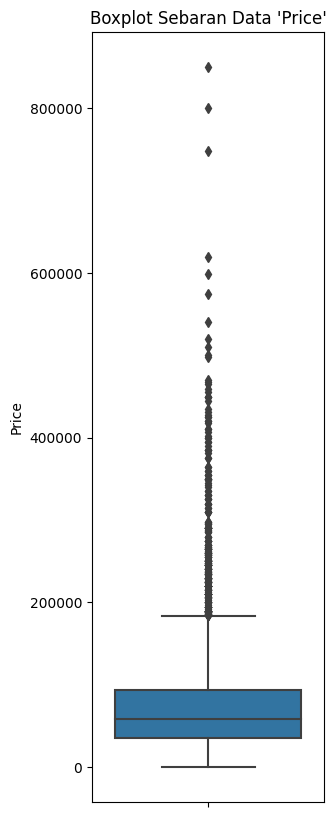

In [96]:
# Membuat Boxplot Variable 'Price'
plt.figure(figsize = (3,10))
plt.title("Boxplot Sebaran Data 'Price'")
sns.boxplot(y = df_model.Price)
plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')
plt.show()

Dari Boxplot di atas, terlihat bahwa nilai outlier menjalar keatas. Berdasarkan urutan 'Price' dari terkecil dan nilai minimun 'Price' dari deskripsi, terdapat nilai yang tidak masuk akal yang mana tidak mungkin menjual mobil bekas dengan harga 1 Riyal dengan jenis mobil GMC Yukon keluaran tahun 2019 dengan jarak tempuh yang sudah dimiliki 50,000 KM. Adapun penelitian yang saya dilakukan pada beberapa sources dan didapatkan hasil bahwa tidak realistis jika menjual mobil bekas dengan harga kurang dari 1,000 Riyal. Pengecekan pada e-commerce / market place luar negeri pun dilakukan untuk mengidentifikasi range mana yang tidak memungkinkan untuk menjual mobil bekas. Penelitian dan penelusuran lebih dalam dapat membantu kita dalam mengambil tindakan yang berlandasan serta membawa kita ketelitian yang lebih baik. Berikut adalah beberapa sources yang saya gunakan.  
[Source 1](https://bangka.tribunnews.com/2022/03/09/segini-harga-mobil-mewah-di-arab-saudi-ternyata-lebih-murah-dibandingkan-di-indonesia?page=3), [Source 2](https://bangka.tribunnews.com/2022/08/15/ternyata-ini-alasan-kenapa-mobil-mewah-bekas-di-negara-arab-saudi-sangat-murah), [Source 3](https://carros.com/mobil-dijual/arab-saudi/mekah-st13911/?lang=id), [Source 4](https://indonesian.alibaba.com/g/used-cars-in-saudi-arabia.html)  

Dari analisis di atas, maka diputuskan untuk menghapus baris data yang berisikan harga kurang dari 5,000 Riyal, guna mengantisipasi data outlier pada variable 'Price'.

In [97]:
# Menghapus data outlier pada variable 'Price'
df_model = df_model[(df_model['Price'] >= 5000)]
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 3482 to 3513
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3756 non-null   object 
 1   Region       3756 non-null   object 
 2   Make         3756 non-null   object 
 3   Gear_Type    3756 non-null   object 
 4   Origin       3756 non-null   object 
 5   Options      3756 non-null   object 
 6   Year         3756 non-null   int64  
 7   Engine_Size  3756 non-null   float64
 8   Mileage      3756 non-null   int64  
 9   Price        3756 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 322.8+ KB


`2. Variable 'Year', 'Engine_Size', 'Mileage'`  
Mari melakukan pengecekan data outlier pada variable lainnya dengan menggambarkan boxplot pada variable numerik.

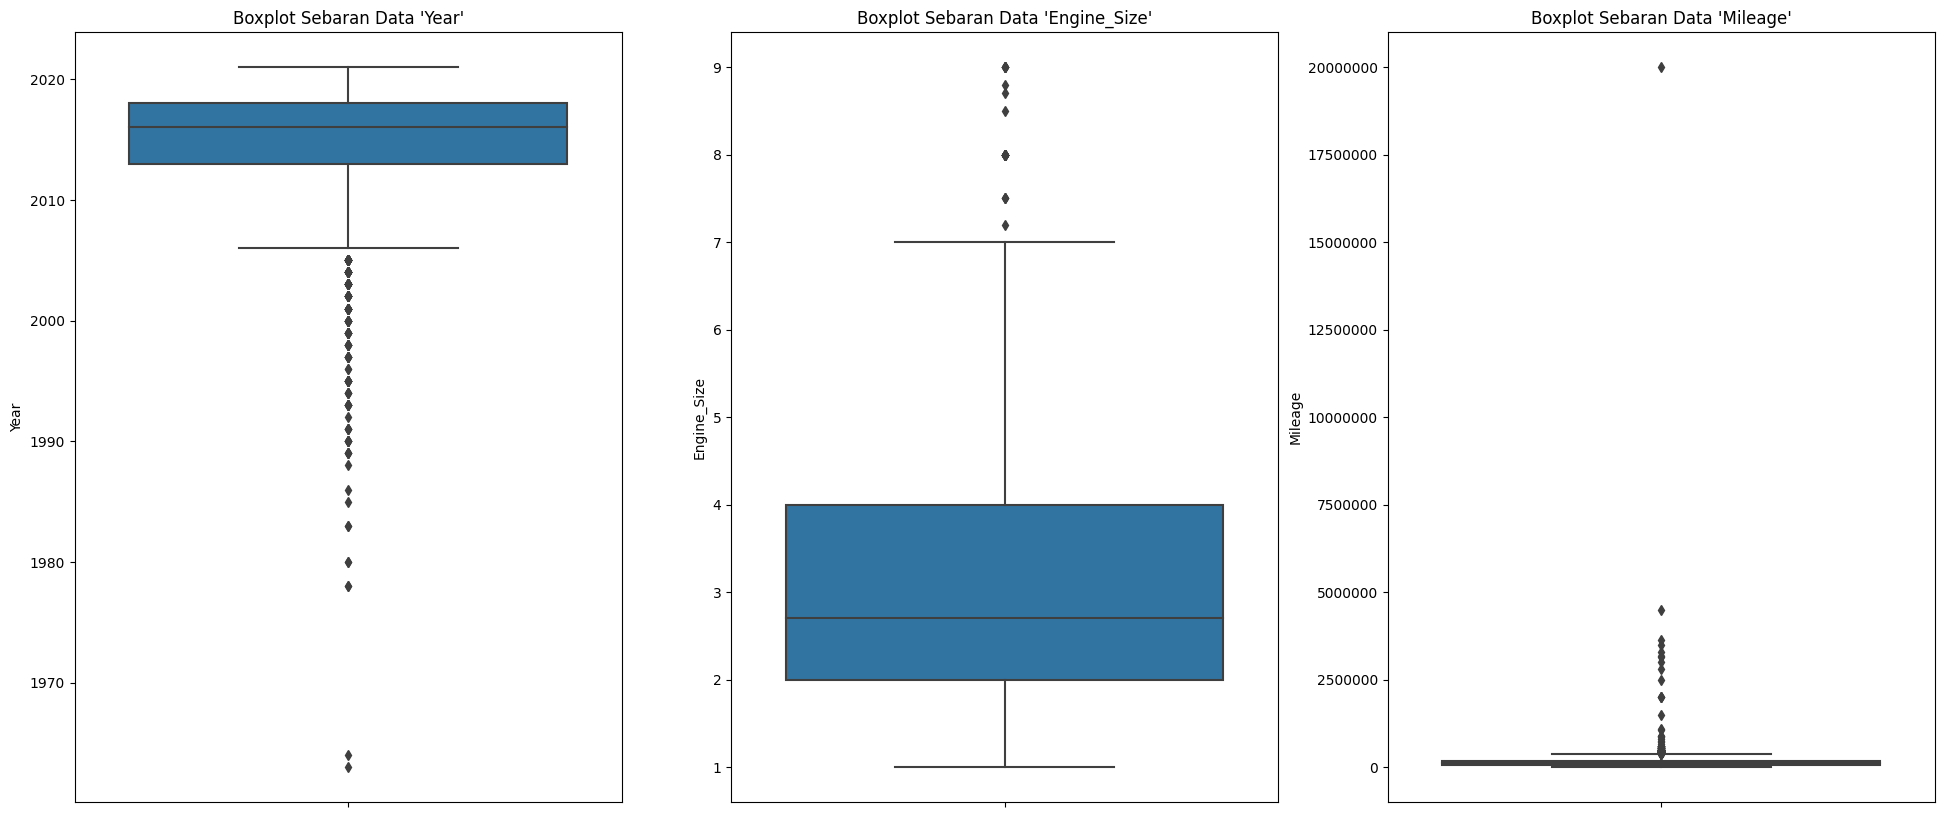

In [98]:
# Menampilkan grafik boxplot untuk melihat data outlier
plt.figure(figsize=(24,10))

plt.subplot(1,3,1)
plt.title("Boxplot Sebaran Data 'Year'")
sns.boxplot(y = df_model.Year)
plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')

plt.subplot(1,3,2)
plt.title("Boxplot Sebaran Data 'Engine_Size'")
sns.boxplot(y = df_model.Engine_Size)
plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')

plt.subplot(1,3,3)
plt.title("Boxplot Sebaran Data 'Mileage'")
sns.boxplot(y = df_model.Mileage)
plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')

plt.show()

Memang merupakan suatu tantangan bagi kita untuk bisa menetapkan data outlier mana yang bersifat mempengaruhi analisa dan tidak, serta data mana yang perlu dihapus tanpa membuat kita kehilangan banyak data untuk membangun model. Mari melihat lebih jauh data pada variable di atas dengan menampilkan deskripsi variable menggunakan percentile yang spesifik.    

In [99]:
# Menampilkan Deskripsi Data Variable dengan percentile yang spesifik
print(df_model[['Year', 'Mileage','Engine_Size']].describe(percentiles = [0.05,0.1,0.2,0.25,0.50,0.75,0.85,0.90,1]))

           Year       Mileage  Engine_Size
count 3756.0000     3756.0000    3756.0000
mean  2014.8017   143881.9271       3.1876
std      5.0942   381530.0082       1.4605
min   1963.0000      100.0000       1.0000
5%    2006.0000      276.7500       1.4000
10%   2009.0000     4896.5000       1.5000
20%   2012.0000    34000.0000       1.8000
25%   2013.0000    49000.0000       2.0000
50%   2016.0000   104079.5000       2.7000
75%   2018.0000   184000.0000       4.0000
85%   2019.0000   240000.0000       5.3000
90%   2019.0000   285602.5000       5.3000
100%  2021.0000 20000000.0000       9.0000
max   2021.0000 20000000.0000       9.0000


Dari beberapa artikel yang ditelusuri mengatakan bahwa faktor - faktor yang sangat mempengaruhi harga jual mobil bekas adalah inflasi, biaya produksi, minat masyarakat, merek mobil (Type and Make), jarak tempuh (Mileage), kondisi mekanis/mesin, warna serta modifikasi, dan kondisi mobil eksterior maupun interior ([Source 5](https://www.seva.id/blog/faktor-yang-mempengaruhi-harga-mobil-naik-turun-052022-kg/)). Adapun penelusuran yang dilakukan pada hasil wawancara dengan salah satu pemilik dealer mobil bekas yang mengatakan bahwa 'Kilometer adalah faktor yang banyak mempengaruhi harga jual, orang mengira mobil yang dipakai buat taksi online atau buat disewain luar kota, makanya orang lebih cari aman dengan mencari yang kilometernya wajar' ([Source 6](https://otoseken.gridoto.com/read/342927098/ini-faktor-faktor-penyebab-harga-jual-mobil-bekas-anjlok-yang-wajib-diketahui)). Kemudian, ditemukan artikel lainnya yang menyatakan bahwa jarak tempuh makin kecil, akan semakin diminati konsumen. Jika angka di jarak tempuh memiliki kilometer yang tinggi, jangan kecewa jika mobil bekas tersebut hanya akan terjual dengan harga murah. Normalnya, dalam setahun mobil akan menempuh kurang lebih 10,000 kilometer. Bila umur mobil tersebut 3 tahun dan angka kilometernya menunjukkan kisaran 30,000, maka akan dianggap normal ([Source 7](https://www.jawapos.com/otomotif/01270419/beberapa-hal-yang-mempengaruhi-harga-mobil-bekas-turun-harga)).  

Oleh karena itu, data outlier di atas akan berfokuskan pada variable Mileage / Jarak tempuh. Perhatikan visualisasi dan data deskripsi di atas, terlihat bahwa Mileage memiliki nilai maksimum 20,000,000 KM. Hal ini tidak mungkin, karena sudah dijelaskan melalui perhitungan dari artikel di atas. Melalui artikel - artikel lain sebagai pendukung analisis juga, seperti ([Source 8](https://otospector.co.id/blog/harga-sangat-dipengaruhi-faktor-ini)), ([Source 9](https://www.otosia.com/berita/read/4746264/6-faktor-yang-mempengaruhi-harga-jual-sebuah-mobil-bekas)), maka diputuskan menghapus data yang nilainya melebihi 700,000 KM di kolom Mileage. 

In [100]:
# Menghapus data outlier pada variable 'Mileage'
df_model = df_model[(df_model['Mileage'] <= 700000)]
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3734 entries, 3482 to 3513
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3734 non-null   object 
 1   Region       3734 non-null   object 
 2   Make         3734 non-null   object 
 3   Gear_Type    3734 non-null   object 
 4   Origin       3734 non-null   object 
 5   Options      3734 non-null   object 
 6   Year         3734 non-null   int64  
 7   Engine_Size  3734 non-null   float64
 8   Mileage      3734 non-null   int64  
 9   Price        3734 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 320.9+ KB


Data outlier pada variable 'Year' dan 'Engine_Size' tidak akan diusik karena berdasarkan landasan artikel / penelusuran, variable ini tidak begitu mempengaruhi harga mobil bekas. Adapun fakta pendukung yang mana apabila mobil bekas keluaran tahun lama merupakan bagian dari mobil klasik, akan bisa memiliki nilai harga jual yang tinggi ([Source 10](https://carro.id/blog/berita/berikut-alasan-kenapa-mobil-klasik-memiliki-harga-yang-tinggi/5368/)). Hal ini juga dilakukan agar kita tidak kehilangan banyak informasi data.  

Pada data info di atas, jumlah data yang saat ini kita miliki adalah 3,734 data. Artinya, jumlah data yang sudah bersih dan siap untuk dibawa ke proses selanjutnya adalah sebesar 66.39% dari data awal. 

In [101]:
# Melihat data yang sudah bersih
df_model.head(10)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3482,Caprice,Riyadh,Chevrolet,Automatic,Saudi,Standard,2006,3.6000,380000,5000
2612,Suburban,Aseer,GMC,Automatic,Saudi,Semi Full,1990,3.5000,140000,5000
693,Accent,Dammam,Hyundai,Manual,Saudi,Standard,2005,1.5000,294602,5000
3052,Expedition,Al-Medina,Ford,Automatic,Saudi,Semi Full,2003,5.4000,400000,5000
62,SEL,Tabouk,Mercedes,Automatic,Saudi,Full,1986,3.0000,500000,5500
1629,Other,Jeddah,Other,Manual,Other,Semi Full,2021,1.2000,3000,5500
5432,Optima,Taef,Kia,Manual,Other,Standard,2006,1.3000,290000,6000
1717,Other,Jeddah,Honda,Manual,Saudi,Standard,2011,1.0000,4200,6500
5599,Corolla,Dammam,Toyota,Manual,Other,Standard,1997,1.3000,32500,7000
1545,Explorer,Khobar,Ford,Automatic,Saudi,Standard,2005,4.0000,300000,7000


## **4. Features Engineering**

Feature engineering adalah langkah preprocessing Machine Learning, yang digunakan untuk mengubah data mentah menjadi fitur yang dapat digunakan untuk membuat model prediktif menggunakan Machine Learning atau Statistical Modelling. Feature engineering dalam Machine Learning bertujuan untuk meningkatkan performa model. ([Source 11](https://digitalpolar.com/feature-engineering/))

**Encoding**  
Untuk dapat menggunakan semua variable yang dipilih, maka variable - variable kategorikal harus diubah menjadi variable numerikal. Encoding adalah suatu metode yang dapat diterapkan untuk merepresentasikan variabel kategorik dalam machine learning. Selain itu, kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model. Pipeline model adalah cara untuk menyusun dan mengotomatiskan alur kerja yang diperlukan untuk menghasilkan model pada machine learning. ([Source 12](https://valohai-com.translate.goog/machine-learning-pipeline/?_x_tr_sl=en&_x_tr_tl=id&_x_tr_hl=id&_x_tr_pto=wapp&_x_tr_hist=true))

In [102]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [103]:
# Mengubah fitur kategorikal menjadi numerikal

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(), ['Options', 'Gear_Type']),
    ('Binary', ce.BinaryEncoder(), ['Type', 'Region', 'Make', 'Origin'])
], remainder='passthrough')

## **5. Modeling**

Pada langkah ini, kita akan membuat model untuk memprediksi dataset. Model terbaik adalah model yang bisa mendapatkan akurasi tertinggi dan kestabilan terbaik. Di akhir, kita akan membandingkan antar model dan memilih model mana yang terbaik berdasarkan nilai dan lainnya.

**Import Libraries**

In [104]:
!pip install rfpimp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [105]:
# Import library untuk modeling
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from math import sqrt

from rfpimp import permutation_importances

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Data Splitting**

In [106]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['Price'], axis = 1)
Y = df_model['Price']

**Train and Test Splitting**

In [107]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, Y_train, Y_test = train_test_split(
    X, 
    Y, 
    test_size = 0.3, 
    random_state = 1)

**Choose a Benchmark Model**

In [108]:
# Define algoritma yang digunakan
LR = LinearRegression()
KNN = KNeighborsRegressor()
DT = DecisionTreeRegressor(random_state = 1)
RF = RandomForestRegressor(random_state = 1)
XGB = XGBRegressor(random_state = 1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
Log_LR = TransformedTargetRegressor(LR, func = np.log, inverse_func = np.exp)
Log_KNN = TransformedTargetRegressor(KNN, func = np.log, inverse_func = np.exp)
Log_DT = TransformedTargetRegressor(DT, func = np.log, inverse_func = np.exp)
Log_RF = TransformedTargetRegressor(RF, func = np.log, inverse_func = np.exp)
Log_XGB = TransformedTargetRegressor(XGB, func = np.log, inverse_func = np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [Log_LR, Log_KNN, Log_DT, Log_RF, Log_XGB]

Score_RMSE = []
Nilai_Mean_RMSE = []
Nilai_Std_RMSE = []

Score_MAE = []
Nilai_Mean_MAE = []
Nilai_Std_MAE = []

Score_MAPE = []
Nilai_Mean_MAPE = []
Nilai_Std_MAPE = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits = 5, shuffle = True, random_state = 1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    Model_CV_RMSE = cross_val_score(
        estimator, 
        X_train, 
        Y_train, 
        cv = crossval, 
        scoring = 'neg_root_mean_squared_error', 
        error_score = 'raise'
        )

    print(Model_CV_RMSE, i)

    Score_RMSE.append(Model_CV_RMSE)
    Nilai_Mean_RMSE.append(Model_CV_RMSE.mean())
    Nilai_Std_RMSE.append(Model_CV_RMSE.std())

    # MAE
    Model_CV_MAE = cross_val_score(
        estimator, 
        X_train, 
        Y_train, 
        cv = crossval, 
        scoring = 'neg_mean_absolute_error', 
        error_score = 'raise'
        )

    print(Model_CV_MAE, i)

    Score_MAE.append(Model_CV_MAE)
    Nilai_Mean_MAE.append(Model_CV_MAE.mean())
    Nilai_Std_MAE.append(Model_CV_MAE.std())

    # MAPE
    Model_CV_MAPE = cross_val_score(
        estimator, 
        X_train, 
        Y_train, 
        cv = crossval, 
        scoring = 'neg_mean_absolute_percentage_error', 
        error_score = 'raise'
        )

    print(Model_CV_MAPE, i)

    Score_MAPE.append(Model_CV_MAPE)
    Nilai_Mean_MAPE.append(Model_CV_MAPE.mean())
    Nilai_Std_MAPE.append(Model_CV_MAPE.std())

[-60131.7041786  -46821.63771505 -44934.70726697 -56983.20027593
 -41460.3596937 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-29712.43897562 -25902.60456866 -25344.28180217 -30301.76944799
 -24924.59853311] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.35559751 -0.36551532 -0.36443931 -0.40295824 -0.37302658] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-57973.45234875 -49418.51683179 -41750.32001617 -53748.98124588
 -43629.71750111] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-28429.7450394  -28584.83706273 -25836.52140178 -27372.57970347
 -27042.65221537] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,


In [109]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': Nilai_Mean_RMSE,
    'Std_RMSE': Nilai_Std_RMSE,
    'Mean_MAE': Nilai_Mean_MAE,
    'Std_MAE': Nilai_Std_MAE,
    'Mean_MAPE': Nilai_Mean_MAPE,
    'Std_MAPE': Nilai_Std_MAPE
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-50066.3218,7212.2002,-27237.1387,2290.4499,-0.3723,0.0163
1,KNN Regressor,-49304.1976,6069.3647,-27453.2671,1002.2915,-0.4632,0.0401
2,DecisionTree Regressor,-55114.5744,7281.5559,-25194.8867,1667.3214,-0.3570,0.0294
3,RandomForest Regressor,-38059.7688,6927.1162,-18317.6042,1695.7575,-0.2402,0.0055
4,XGBoost Regressor,-33239.1234,6897.5866,-16176.2308,1425.8894,-0.2147,0.0109


`Root Mean Squared Error (RMSE)` adalah turunan dari MSE, yaitu : akar kuadrat dari MSE. RMSE menghitung rata - rata dari selisih kuadrat antara nilai prediksi dan nilai aktual kemudian diambil akar kuadratnya. Semakin kecil nilai RMSE, semakin baik kualitas model tersebut. `Mean Absolute Error (MAE)` adalah salah satu metode evaluasi yang dilakukan dengan cara menghitung rata - rata dari selisih absolut antara nilai prediksi dan nilai aktual. Dengan kata lain, MAE menghitung berapa rata - rata kesalahan absolut dalam prediksi. Semakin kecil nilai MAE, semakin baik kualitas model tersebut. `Mean Absolute Percentage Error (MAPE)` adalah metode evaluasi lain yang dilakukan dengan cara menghitung rata - rata dari selisih persentase antara nilai prediksi dan nilai aktual. Dengan kata lain, MAPE menghitung berapa rata - rata kesalahan dalam prediksi sebagai persentase dari nilai aktual. Semakin kecil nilai MAPE, semakin baik kualitas model tersebut.

Melalui tabel di atas, dapat dilihat bahwa terdapat perbedaan yang cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata - ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai - nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

Kemudian, dari data diatas, terlihat ada 2 model terbaik, yaitu RandomForest Regressor dan XGBoost Regressor. Hal ini terbukti dari nilai RMSE, MAE, dan MAPE yang kecil. Walau XGBoost Regressor memiliki nilai lebih kecil daripada RandomForest Regressor. Mari kita pastikan kembali kemampuan kedua model ini dengan melakukan prediksi pada test set.  

([Source 12](https://www.trivusi.web.id/2023/03/perbedaan-mae-mse-rmse-dan-mape.html))

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

In [110]:
# Benchmark 2 model terbaik
modelss = {
    'XGB': XGBRegressor(random_state = 1),
    'RandomForest': RandomForestRegressor(random_state = 1)
}

Score_RMSE = []
Score_MAE = []
Score_MAPE = []

# Prediksi pada test set
for i in modelss:

    MODEL = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', modelss[i])
        ])

    MODEL.fit(X_train, Y_train)
    Y_pred = MODEL.predict(X_test)
    Score_RMSE.append(np.sqrt(mean_squared_error(Y_test, Y_pred)))
    Score_MAE.append(mean_absolute_error(Y_test, Y_pred))
    Score_MAPE.append(mean_absolute_percentage_error(Y_test, Y_pred))

score_before_tuning = pd.DataFrame({'RMSE': Score_RMSE, 'MAE': Score_MAE, 'MAPE': Score_MAPE}, index=modelss.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,31724.8685,17267.3505,0.2925
RandomForest,35460.5728,17515.1213,0.2965


Hasil dari dilakukannya prediksi pada test set, disimpulkan bahwa `performa XGBoost secara akumulatif sedikit lebih baik`. Hal ini dapat dilihat dari nilai RMSE, MAE, dan MAPE yang lebih rendah dari RandomForest.

**Hyperparameter Tuning**  

Terpilihlah model XGBoost sebagai model akhir. Untuk meningkatkan performa model, mari lakukan hyperparameter tuning.  
Adapun referensi yang bisa digunakan untuk melakukan Hyperparameter Tuning pada XGBoost model seperti tautan berikut. ([Source 13](https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f)), ([Source 14](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters))

In [111]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11))              # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10))    # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [112]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits = 5, shuffle = True, random_state = 1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [113]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, Y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(),
                                                                               ['Options',
                                                                                'Gear_Type']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type',
                                                                                'Region',
                                                                                'Make',
                                                                                'Origin'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [114]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,param_model__colsample_bytree,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
17,1.8785,0.3554,0.0482,0.0185,0.6000,0.0010,190,5,0.0400,9,0.9000,"{'model__subsample': 0.6, 'model__reg_alpha': ...",-39912.7669,-30454.8616,-34184.7917,-42012.3021,-28026.6100,-34918.2665,5352.1075,1,-19979.9477,-17091.2987,-18337.0427,-19384.8815,-17357.0597,-18430.0461,1119.4730,2,-0.2825,-0.3011,-0.2793,-0.2618,-0.2802,-0.2810,0.0125,2
7,3.1383,0.6182,0.0826,0.0338,0.9000,0.0599,119,8,0.0500,5,0.8000,"{'model__subsample': 0.9, 'model__reg_alpha': ...",-41622.2996,-31698.0125,-31961.0099,-43987.6582,-27176.0414,-35289.0043,6411.9910,2,-19216.5481,-16160.1531,-16516.6106,-18578.1947,-15646.2006,-17223.5414,1408.9507,1,-0.2721,-0.2864,-0.2470,-0.2425,-0.2563,-0.2609,0.0163,1
3,1.8225,0.2285,0.0792,0.0295,0.5000,0.0215,166,8,0.1000,9,0.3000,"{'model__subsample': 0.5, 'model__reg_alpha': ...",-43035.5846,-32936.7625,-31206.4493,-43744.0845,-28621.4210,-35908.8604,6264.7226,3,-21303.1069,-18534.7611,-19308.2754,-20267.9250,-18102.8989,-19503.3935,1162.8570,3,-0.3525,-0.3760,-0.3511,-0.3149,-0.3250,-0.3439,0.0217,6
20,0.6730,0.0086,0.0322,0.0026,0.9000,0.0077,143,4,0.3800,6,0.8000,"{'model__subsample': 0.9, 'model__reg_alpha': ...",-41070.0270,-30400.1697,-35765.9577,-43213.6083,-31065.4590,-36303.0443,5158.3856,4,-21024.2772,-19218.7610,-19599.7027,-21487.6023,-19624.3579,-20190.9402,893.4756,4,-0.3309,-0.3759,-0.3205,-0.3067,-0.3539,-0.3376,0.0246,4
8,1.2976,0.2105,0.0362,0.0024,0.7000,0.0215,182,6,0.3100,2,0.6000,"{'model__subsample': 0.7, 'model__reg_alpha': ...",-41310.9116,-34610.8811,-34048.8752,-43093.2917,-29172.1063,-36447.2132,5096.6115,5,-21788.8212,-19785.6022,-19682.4488,-21075.2176,-18655.3884,-20197.4956,1105.9599,5,-0.3682,-0.3646,-0.3173,-0.3265,-0.3331,-0.3420,0.0206,5


In [115]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -34918.26647185943
Best_params: {'model__subsample': 0.6, 'model__reg_alpha': 0.001, 'model__n_estimators': 190, 'model__max_depth': 5, 'model__learning_rate': 0.04, 'model__gamma': 9, 'model__colsample_bytree': 0.9}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [116]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state = 1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, Y_train)

# Predict test set
Y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(Y_test, Y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(Y_test, Y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(Y_test, Y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,31883.4065,17235.8840,0.2848


**Performance Comparison**

Berikutnya, yang akan dilakukan adalah membandingkan performa model XGBoost sebelum dan sesudah dilakukannya hyperparameter tuning.

`Score Sebelum Hyperparameter Tuning`

In [117]:
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,31724.8685,17267.3505,0.2925


`Score Setelah Hyperparameter Tuning`

In [118]:
score_after_tuning

,RMSE,MAE,MAPE
XGB,31883.4065,17235.8840,0.2848


Hasil perbandingan di atas membuktikan bahwa model mengalami peningkatan performa dari segi penilaian MAE & MAPE yang berkurang, dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit. Sedangkan, terjadi penurunan performa pada penilaian RMSE, karena nilainya bertambah. 

| **Keterangan** | **RMSE** | **MAE** | **MAPE** |
| --- | --- | --- | --- |
| Sebelum | 31724.86 | 17267.35 | 0.29 |
| Setelah | 31883.40 | 17235.88 | 0.28 |  

Saat melakukan hyperparameter tuning, biasanya menyesuaikan parameter model machine learning untuk mengoptimalkan kinerjanya. Tujuannya biasanya untuk meminimalkan metrik evaluasi yang terpilih, seperti Root Mean Square Error (RMSE), Mean Absolute Error (MAE), dan Mean Absolute Percentage Error (MAPE).  

Dalam hal ini, penting untuk diperhatikan bahwa metrik evaluasi yang berbeda menangkap aspek performa model yang berbeda. Mari kita bahas mengapa nilai RMSE dapat meningkat sementara nilai MAE dan MAPE menurun setelah hyperparameter tuning:  

1. Root Mean Square Error (RMSE) adalah ukuran deviasi rata - rata nilai prediksi dari nilai sebenarnya, di mana kesalahan dikuadratkan sebelum dirata - ratakan. Mengkuadratkan kesalahan memperkuat dampak kesalahan yang lebih besar. Jika nilai RMSE meningkat setelah hyperparameter tuning, maka ini menunjukkan bahwa prediksi model memiliki penyimpangan yang lebih tinggi dari nilai sebenarnya. Khususnya untuk kesalahan yang lebih besar. Ini bisa menunjukkan bahwa model menjadi kurang akurat secara keseluruhan.  
2. Mean Absolute Error (MAE), berlaku sebaliknya, mengukur perbedaan absolut rata - rata antara nilai prediksi dan aktual. Itu tidak dipengaruhi oleh besarnya kesalahan dan memperlakukan semua kesalahan secara sama. Jika nilai MAE menurun setelah hyperparameter tuning, maka ini menyiratkan bahwa prediksi model rata - rata menjadi lebih akurat, terlepas dari besarnya kesalahan.
3. Mean Absolute Percentage Error (MAPE)  berfungsi untuk mengukur perbedaan persentase antara nilai prediksi dan aktual relatif terhadap nilai aktual. Seperti MAE, itu tidak mempertimbangkan besarnya kesalahan. Jika nilai MAPE menurun setelah hyperparameter tuning, itu berarti prediksi model telah meningkat dalam hal akurasi relatifnya, terlepas dari kesalahan absolutnya. 

Sekarang, mengapa RMSE bisa meningkat sementara MAE dan MAPE menurun ? Salah satu kemungkinannya adalah proses hyperparameter tuning lebih menekankan pada pengurangan MAE dan MAPE, dan sebagai hasilnya, model menjadi lebih akurat dalam hal besaran kesalahan rata - rata dan akurasi relatif. Namun, penekanan pada pengurangan kesalahan rata - rata dan relatif ini mungkin tidak memprioritaskan pengurangan kesalahan yang lebih besar, yang menyebabkan peningkatan RMSE.

Berikut adalah gambaran sebaran data melalui grafik yang membandingkan model antara Price Actual dengan Prediction.  

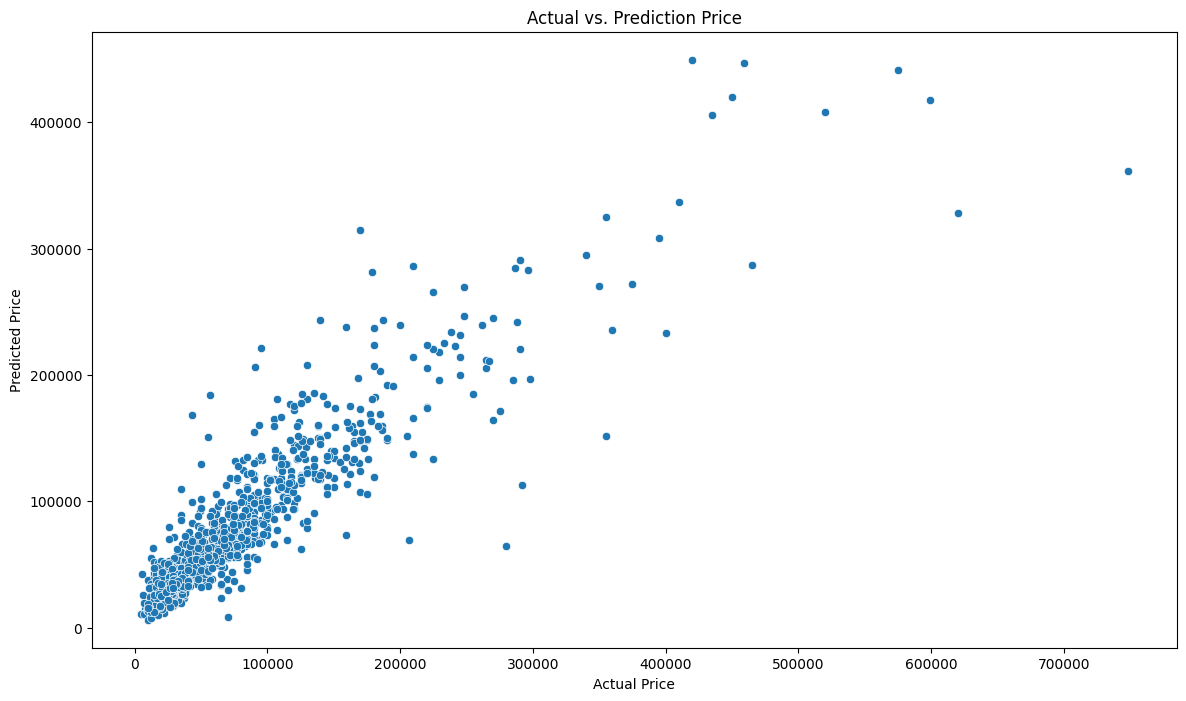

In [119]:
# Grafik Actual vs. Prediction Price
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x = Y_test, y = Y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price')

Grafik ini menunjukkan dengan jelas bahwa, model yang dibentuk menghasilkan 'Price' Prediction yang nampak linier terhadap 'Price' Actual. Namun jika dilihat lebih teliti, grafik ini menampakkan plot data yang tidak teratur ketika 'Price' mulai melebihi 150.000. 

**Feature Importances**  

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (price), kita dapat mengeceknya melalui function feature_importances_.

In [120]:
# Plot feature importances
xgb_tuning['model'].feature_importances_

array([0.13348599, 0.01184861, 0.00964084, 0.02187709, 0.01323047,
       0.01237018, 0.00991887, 0.02372874, 0.0215513 , 0.03718673,
       0.02737425, 0.02615624, 0.02508004, 0.0295748 , 0.00822069,
       0.01725531, 0.01338931, 0.01627687, 0.01257594, 0.01409799,
       0.04921635, 0.04464609, 0.03930773, 0.06478254, 0.05254569,
       0.02095029, 0.0191649 , 0.10259682, 0.08309984, 0.03884953],
      dtype=float32)

In [121]:
transformer.get_feature_names_out()

array(['One Hot__Options_Full', 'One Hot__Options_Semi Full',
       'One Hot__Options_Standard', 'One Hot__Gear_Type_Automatic',
       'One Hot__Gear_Type_Manual', 'Binary__Type_0', 'Binary__Type_1',
       'Binary__Type_2', 'Binary__Type_3', 'Binary__Type_4',
       'Binary__Type_5', 'Binary__Type_6', 'Binary__Type_7',
       'Binary__Type_8', 'Binary__Region_0', 'Binary__Region_1',
       'Binary__Region_2', 'Binary__Region_3', 'Binary__Region_4',
       'Binary__Make_0', 'Binary__Make_1', 'Binary__Make_2',
       'Binary__Make_3', 'Binary__Make_4', 'Binary__Make_5',
       'Binary__Origin_0', 'Binary__Origin_1', 'remainder__Year',
       'remainder__Engine_Size', 'remainder__Mileage'], dtype=object)

In [122]:
importance_table = pd.DataFrame({
    'imp':xgb_tuning['model'].feature_importances_
}, index = transformer.get_feature_names_out())
importance_table.sort_values(by='imp', ascending = False)

,imp
One Hot__Options_Full,0.1335
remainder__Year,0.1026
remainder__Engine_Size,0.0831
Binary__Make_4,0.0648
Binary__Make_5,0.0525
Binary__Make_1,0.0492
Binary__Make_2,0.0446
Binary__Make_3,0.0393
remainder__Mileage,0.0388
Binary__Type_4,0.0372


<Axes: title={'center': 'Feature Importances'}>

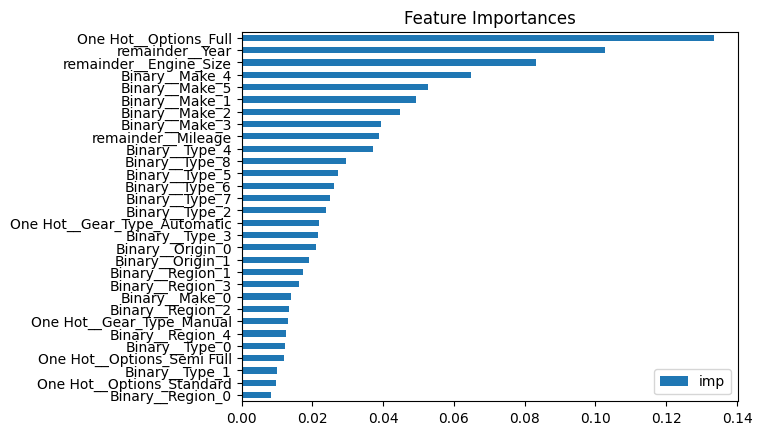

In [123]:
importance_table.sort_values(by='imp').plot(kind='barh', title='Feature Importances')

## **6. Conclusion**

Berdasarkan pemodelan yang sudah dilakukan, fitur 'Options', 'Year' dan 'Engine_Size' menjadi fitur yang paling berpengaruh terhadap 'Price'. Hal ini juga dapat didukung dari artikel - artikel yang ada.  

Metrik evaluasi yang digunakan pada model ini adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar ~28%. Sehingga, dapat disimpulkan bahwa bila nanti model yang dibuat ini digunakan untuk memperkirakan harga mobil bekas baru di Saudi pada rentang nilai seperti yang dilatih terhadap model (0 - 500.000 Riyal dan berdasarkan apa yang sudah difilter di awal), maka perkiraan harganya rata - rata akan meleset kurang lebih sebesar 28% dari harga seharusnya.  

Adapun nilai evaluasi pada RMSE yang meningkat setelah dilakukan hyperparameter tunning. Salah satu kemungkinannya adalah proses hyperparameter tuning lebih menekankan pada pengurangan MAE dan MAPE, dan sebagai hasilnya, model menjadi lebih akurat dalam hal besaran kesalahan rata - rata dan akurasi relatif. Namun, penekanan pada pengurangan kesalahan rata - rata dan relatif ini mungkin tidak memprioritaskan pengurangan kesalahan yang lebih besar, yang menyebabkan peningkatan RMSE. 

Berdasarkan grafik pembanding harga aktual dengan prediksi, model ini dapat diandalkan dalam memprediksi harga mobil bekas dengan rentang terbaik antara 0 - 500.000 Riyal. Namun, untuk mendapatkan kisaran harga yang lebih baik lagi, maka disarankan untuk prediksi harga di bawah 150.000 Riyal. Hal ini dikarenakan apabila memprediksi harga lebih dari 150.000 Riyal, terdapat bias yang dihasilkan model masih cukup tinggi bila dilihat dari visualisasi grafik tersebut.	 

## **7. Recommendation**

Hal - hal yang dapat dilakukan untuk mengembangkan model menjadi lebih baik :  
1. Jika memungkinkan, lakukan penambahan fitur yang lebih korelatif dengan target ('price'), seperti Kondisi mesin, Kondisi eksterior interior mobil, atau warna serta modifikasi. 
1. Selain itu, adanya penambahan data terkini untuk Saudi Used Cars tentu akan dapat mengimprovisasi kapasitas prediksi dari model.
1. Bisa melakukan identifikasi pada model terbaik kedua, untuk bisa melihat indikasi - indikasi kemungkinan yang berbeda. (Seperti: membandingkan hasil nilai evaluasi 2 model)
1. Model yang sudah dibangun ini bisa dimanfaatkan untuk pengembangan pembuatan model lainnya. Contohnya seperti pembuatan model untuk memprediksi harga mobil bekas dari negara lainnya. Hal ini berguna karena setiap daerah/negara pasti memiliki jumlah data dengan variasi yang berbeda. Sehingga, mempengaruhi skor prediksi untuk data - data tersebut. 

****

In [124]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, Y_train)

pickle.dump(estimator, open('Model_Saudi_Used_Cars_XGB.sav', 'wb'))

# Load model
filename = 'Model_Saudi_Used_Cars_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

np.sqrt(mean_squared_error(Y_test, loaded_model.predict(X_test)))

31725.670494180275